In [1]:
# Name:  Obembe, Olufemi
# Assignment:  Week 4:  Predicting Fuel Efficiency
# Date:  January 4, 2022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset

df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# Remove the car name column

df = df.drop(['car name'],axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
# Check for values in horsepower

#df['horsepower'].unique().tolist()

In [6]:
#  The column was imputed as string, we need to convert it to numeric

df['horsepower'] = pd.to_numeric(df['horsepower'],errors="coerce")

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
# horsepower has 6 missing values which will be replaced by the mean of the column

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
# Creating a dummy variable for origin column

df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [12]:
df_dummies = pd.get_dummies(df,columns=['origin'])
df_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [13]:
# Create a correlation matrix or visualization to detect features correlated with mpg
df_matrix = df.corr().round(2)
print(df_matrix)

               mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.80       -0.77   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.51   
displacement -0.80       0.95          1.00        0.89    0.93         -0.54   
horsepower   -0.77       0.84          0.89        1.00    0.86         -0.68   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.51         -0.54       -0.68   -0.42          1.00   
model year    0.58      -0.35         -0.37       -0.41   -0.31          0.29   
origin        0.56      -0.56         -0.61       -0.45   -0.58          0.21   

              model year  origin  
mpg                 0.58    0.56  
cylinders          -0.35   -0.56  
displacement       -0.37   -0.61  
horsepower         -0.41   -0.45  
weight             -0.31   -0.58  
acceleration        0.29    0.21  
model year          1.00 

In [14]:
# Visualizing the correlations

import seaborn as sns

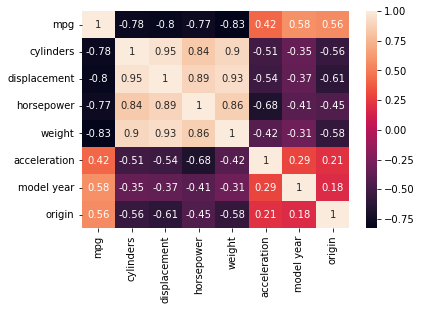

In [15]:
sns.heatmap(df_matrix,annot=True)
plt.show()

In [16]:
# The features that are highly correlated with mpg are:
#  cylinders (-0.79), displacement (0.8), horsepower (-0.77), weight(-0.83)

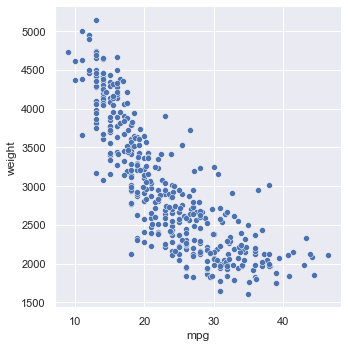

In [17]:
# Plot mpg versus weight and analyze the graph to explain correlation with df_matrix

sns.set(style="darkgrid")
sns.relplot(x="mpg",y="weight",data=df);

In [18]:
# The correlation matrix gave a value of -0.83 between mpg and weight.  This is clearly shown in the sns plot
# where the scatter plot shows a negative relationship between weight and mpg.

In [19]:
# Randomly split the data into 80% training data and 20% test data where mpg = target

X = df.drop("mpg",axis=1)
y = df['mpg']

In [20]:
# import train test split

from sklearn.model_selection import train_test_split

In [21]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [22]:
# Train an OLS on the training dataset

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Calculate R2, RMSE, and MAE on both the training and test sets and interpret results

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
# Obtain the predictions on train and test sets

model_train_pred = model.predict(X_train)
model_test_pred = model.predict(X_test)

In [25]:
# Obtain the performance of the models

R_sqr_train = r2_score(y_train,model_train_pred).round(2)
R_sqr_test = r2_score(y_test,model_test_pred).round(2)
MAE_train = mean_absolute_error(y_train,model_train_pred).round(2)
MAE_test = mean_absolute_error(y_test,model_test_pred).round(2)
MSE_train = mean_squared_error(y_train,model_train_pred).round(2)
MSE_test = mean_squared_error(y_test,model_test_pred).round(2)
RMSE_train = np.sqrt(MSE_train).round(2)
RMSE_test = np.sqrt(MSE_test).round(2)

In [26]:
print(R_sqr_train,R_sqr_test,MAE_train,MAE_test,RMSE_train,RMSE_test)

0.82 0.8 2.52 2.59 3.3 3.4


In [27]:
data = {'train_data':[R_sqr_train,MAE_train,RMSE_train],
       'test_data':[R_sqr_test,MAE_test,RMSE_test]}

metrics = pd.DataFrame(data,index=['R_sqaure','MAE','RMSE'])

print(metrics)

          train_data  test_data
R_sqaure        0.82       0.80
MAE             2.52       2.59
RMSE            3.30       3.40


### Interpretation
#### The R_square shows that the model performs better on the training dataset than the test dataset by 2%.  The MAE was lower in the traning data than in the test data.  Similarly, the RMSE was lower in the training data than in the test data.  This clearly shows a case of overfitting in that the model when deployed to unseen data perform worse.

## Linear Regression Model for Boston Dataset

In [28]:
bf = pd.read_csv("Boston.csv")
bf.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
Xb = bf[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
yb = bf['medv']

In [31]:
Xb.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [32]:
yb.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [33]:
# Split the data into 80:20 ratio

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(Xb, yb, test_size=0.20, random_state=101)

In [34]:
# Train an OLS on the training dataset

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_b,y_train_b)

LinearRegression()

In [35]:
# Obtain the predictions on train and test sets

model_train_pred_b = model.predict(X_train_b)
model_test_pred_b = model.predict(X_test_b)

In [37]:
# Obtain the performance of the models

R_sqr_train_b = r2_score(y_train_b,model_train_pred_b).round(2)
R_sqr_test_b = r2_score(y_test_b,model_test_pred_b).round(2)
MAE_train_b = mean_absolute_error(y_train_b,model_train_pred_b).round(2)
MAE_test_b = mean_absolute_error(y_test_b,model_test_pred_b).round(2)
MSE_train_b = mean_squared_error(y_train_b,model_train_pred_b).round(2)
MSE_test_b = mean_squared_error(y_test_b,model_test_pred_b).round(2)
RMSE_train_b = np.sqrt(MSE_train_b).round(2)
RMSE_test_b = np.sqrt(MSE_test_b).round(2)

In [38]:
print(R_sqr_train_b,R_sqr_test_b,MAE_train_b,MAE_test_b,RMSE_train_b,RMSE_test_b)

0.75 0.7 3.08 4.0 4.38 5.77


In [39]:
data2 = {'train_data':[R_sqr_train_b,MAE_train_b,RMSE_train_b],
       'test_data':[R_sqr_test_b,MAE_test_b,RMSE_test_b]}

metrics2 = pd.DataFrame(data2,index=['R_sqaure','MAE','RMSE'])

print(metrics2)

          train_data  test_data
R_sqaure        0.75       0.70
MAE             3.08       4.00
RMSE            4.38       5.77


### Interpretation
#### The model perform worse on unseen dataset.  The model was able to explain 75% variation in the explanatory variable accounted for by the independent variables in the train set but 70% in the test set.  Similarly, the Mean Absolute Error was lower by 1.08 in the train set than in the test set.  The RMSE was also lower in the train set with 4.38 versus 5.77 in the test set.